In [69]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [70]:
img = cv2.imread('./test/5-24.jpg')
img.shape

(442, 437, 3)

In [71]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(442, 437)

In [72]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

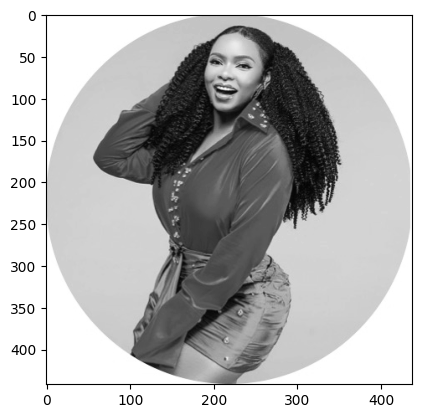

In [73]:
plt.imshow(gray, cmap='gray')

In [74]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[178,  27,  82,  82]])

In [75]:
(x,y,w,h) = faces[0]
x,y,w,h

(178, 27, 82, 82)

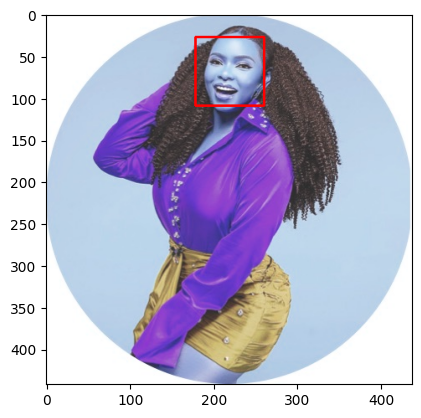

In [76]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
plt.imshow(face_img)

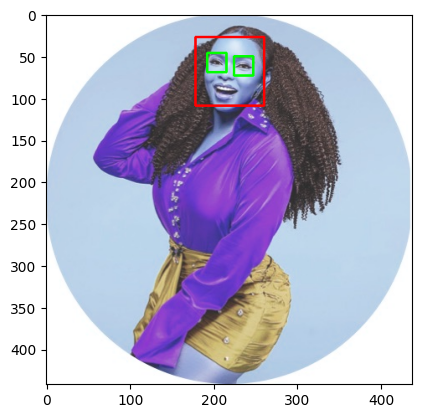

In [77]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew,ey+eh), (0,255,0),2)
        
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

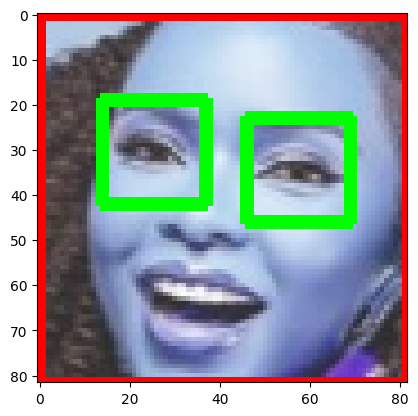

In [78]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [79]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3,5)
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color    

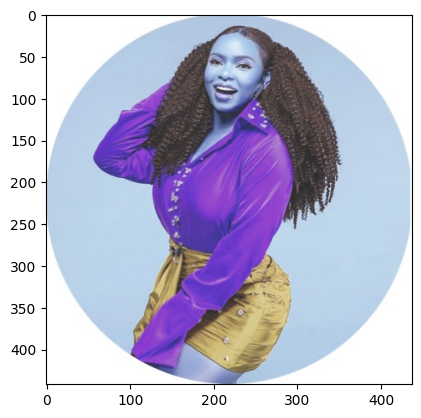

In [80]:
original_image = cv2.imread('./test/5-24.jpg')
plt.imshow(original_image)

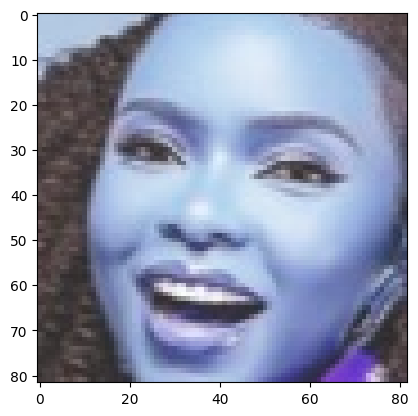

In [81]:
cropped_image = get_cropped_image_if_2_eyes('./test/5-24.jpg')
plt.imshow(cropped_image)

In [82]:
path_to_data = './data/'
path_to_cr_data = './data/cropped/'

In [83]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [84]:
img_dirs

['./data/Burna Boy',
 './data/Davido',
 './data/Falz',
 './data/Tems',
 './data/Tiwa Savage',
 './data/Yemi Alade']

### Create Cropped Folder

In [85]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [86]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]   
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Creating cropped images in folder:', cropped_folder)
                
                
            cropped_file_name = celebrity_name + str(count) + '.jpg'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1                

Burna Boy
Creating cropped images in folder: ./data/cropped/Burna Boy
Davido
Creating cropped images in folder: ./data/cropped/Davido
Falz
Creating cropped images in folder: ./data/cropped/Falz
Tems
Creating cropped images in folder: ./data/cropped/Tems
Tiwa Savage
Creating cropped images in folder: ./data/cropped/Tiwa Savage
Yemi Alade
Creating cropped images in folder: ./data/cropped/Yemi Alade


In [87]:
import numpy as np 
import matplotlib.pyplot as plt 
import pywt

def w2d(img, mode = 'haar', level=1):
    imArray = img
    
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H    

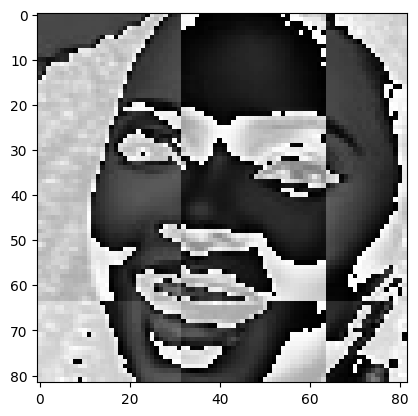

In [88]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [89]:
celebrity_file_names_dict

{'Burna Boy': ['./data/cropped/Burna Boy/Burna Boy1.jpg',
  './data/cropped/Burna Boy/Burna Boy2.jpg',
  './data/cropped/Burna Boy/Burna Boy3.jpg',
  './data/cropped/Burna Boy/Burna Boy4.jpg',
  './data/cropped/Burna Boy/Burna Boy5.jpg',
  './data/cropped/Burna Boy/Burna Boy6.jpg',
  './data/cropped/Burna Boy/Burna Boy7.jpg',
  './data/cropped/Burna Boy/Burna Boy8.jpg',
  './data/cropped/Burna Boy/Burna Boy9.jpg',
  './data/cropped/Burna Boy/Burna Boy10.jpg',
  './data/cropped/Burna Boy/Burna Boy11.jpg',
  './data/cropped/Burna Boy/Burna Boy12.jpg',
  './data/cropped/Burna Boy/Burna Boy13.jpg',
  './data/cropped/Burna Boy/Burna Boy14.jpg',
  './data/cropped/Burna Boy/Burna Boy15.jpg',
  './data/cropped/Burna Boy/Burna Boy16.jpg',
  './data/cropped/Burna Boy/Burna Boy17.jpg',
  './data/cropped/Burna Boy/Burna Boy18.jpg',
  './data/cropped/Burna Boy/Burna Boy19.jpg',
  './data/cropped/Burna Boy/Burna Boy20.jpg',
  './data/cropped/Burna Boy/Burna Boy21.jpg',
  './data/cropped/Burna Boy/Bu

In [90]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Burna Boy': 0,
 'Davido': 1,
 'Falz': 2,
 'Tems': 3,
 'Tiwa Savage': 4,
 'Yemi Alade': 5}

### Data Preparation 
#### Splitting the wavelets transformed data into X and Y variables for training.

In [91]:
x = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [92]:
len(x[0])

4096

In [93]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(181, 4096)

In [94]:
x[0]

array([135., 135., 135., ...,  68.,   1.,   0.])

### Training the Model.

In [95]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.782608695652174

In [97]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [98]:
model_params = {
    'svm' : {
        'model' : svm.SVC(gamma ='auto', probability =True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        
        }    
    }
    
}     
                                          

In [99]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_    
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.637037,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.481481,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.659259,{'logisticregression__C': 1}


In [100]:
best_estimators['svm'].score(x_test,y_test)

0.7608695652173914

In [101]:
best_estimators['random_forest'].score(x_test,y_test)

0.5434782608695652

In [102]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.7608695652173914

In [107]:
best_clf = best_estimators['svm']

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 4,  0,  0,  0,  1,  0],
       [ 1,  4,  0,  0,  0,  0],
       [ 0,  1,  7,  0,  0,  1],
       [ 0,  0,  0,  3,  0,  0],
       [ 1,  0,  0,  1,  5,  1],
       [ 0,  3,  0,  0,  1, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

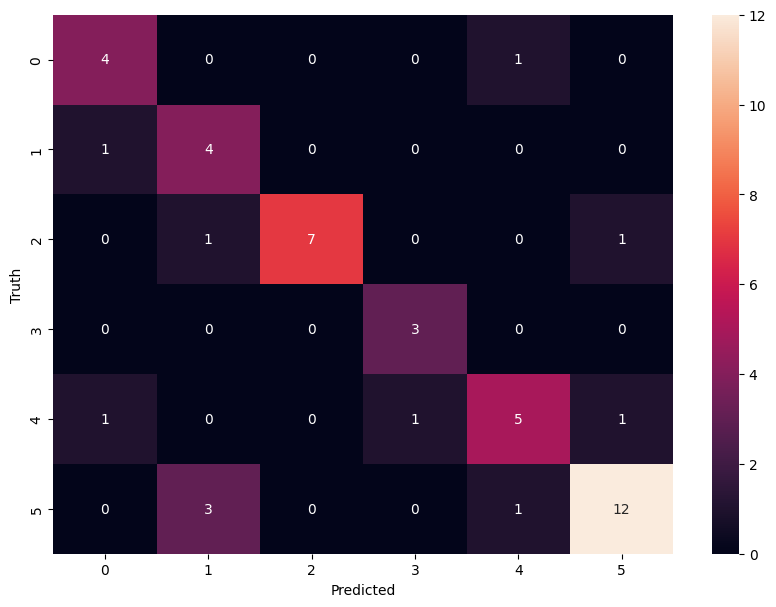

In [110]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [111]:
class_dict

{'Burna Boy': 0,
 'Davido': 1,
 'Falz': 2,
 'Tems': 3,
 'Tiwa Savage': 4,
 'Yemi Alade': 5}

In [112]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [114]:
import json
with open('class_dictionary.json', 'w') as f:
    f.write(json.dumps(class_dict))